In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(rc={"figure.figsize": (12, 6)})
except ImportError:
    print('We suggest you install seaborn using conda or pip and rerun this cell')

# built in python modules
from datetime import datetime, timedelta
import os

# python add-ons
import numpy as np
import pandas as pd
try:
    import netCDF4
    from netCDF4 import num2date
except ImportError:
    print('We suggest you install netCDF4 using conda rerun this cell')

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

import pvlib
from pvlib.forecast import *

In [69]:
# Choose a location and time.
location = [32.2,-110.9] # Tucson, AZ
tz = 'US/Arizona'

start = datetime.now() # today's date
end = start + timedelta(days=7) # 7 days from today
timerange = pd.date_range(start, end, tz=tz)

In [70]:
fm = GFS()

In [71]:
data = fm.get_query_data(location,timerange)

In [72]:
time_vals = fm.time

In [73]:
var_name = 'temperature_iso'

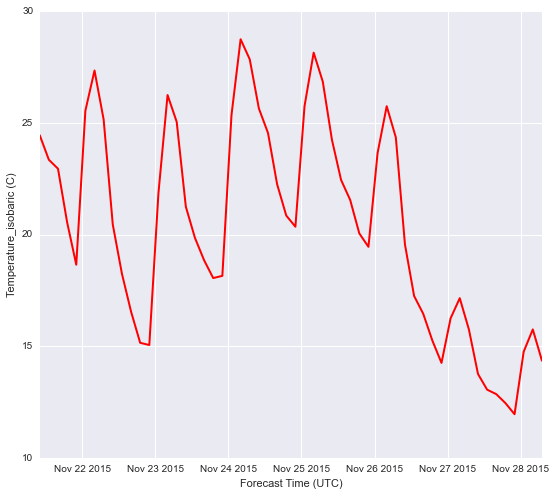

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
ax.plot(time_vals, data[var_name], 'r', linewidth=2)
ax.set_ylabel(fm.var_stdnames[var_name] + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')

In [75]:
cloud_vars = ['total_clouds','low_clouds','mid_clouds','high_clouds']

In [76]:
total_cloud_cover = data['total_clouds']

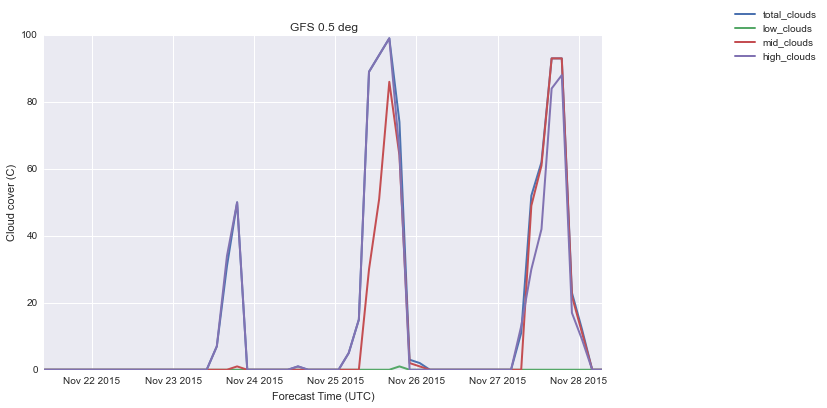

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_ylabel('Cloud cover' + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')
ax.set_title('GFS 0.5 deg')
for varname in cloud_vars:
    ax.plot(time_vals, data[varname], linewidth=2, label=varname)
ax.legend(bbox_to_anchor=(1.4,1.1))    

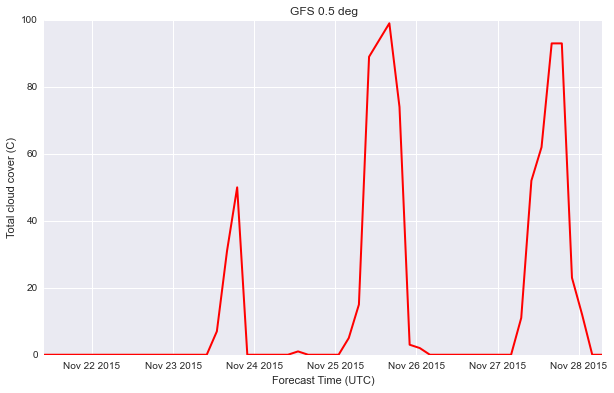

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(time_vals, total_cloud_cover, 'r', linewidth=2)
ax.set_ylabel('Total cloud cover' + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')
ax.set_title('GFS 0.5 deg')

In [112]:
fm = GFS(res='Quarter')

In [113]:
data = fm.get_query_data(location,timerange)

In [116]:
time_vals = fm.time

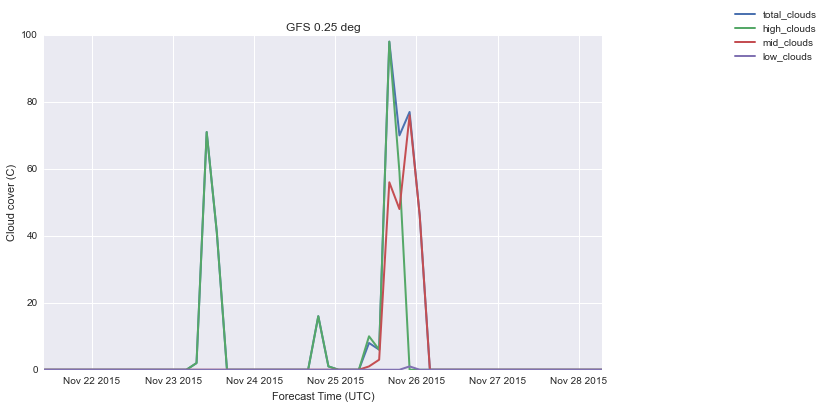

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot(time_vals, data[varname], linewidth=2, label=varname)
    
ax.set_ylabel('Cloud cover' + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))
ax.set_title('GFS 0.25 deg')

In [79]:
fm = NAM()

In [80]:
data = fm.get_query_data(location,timerange)

In [81]:
time_vals = fm.time

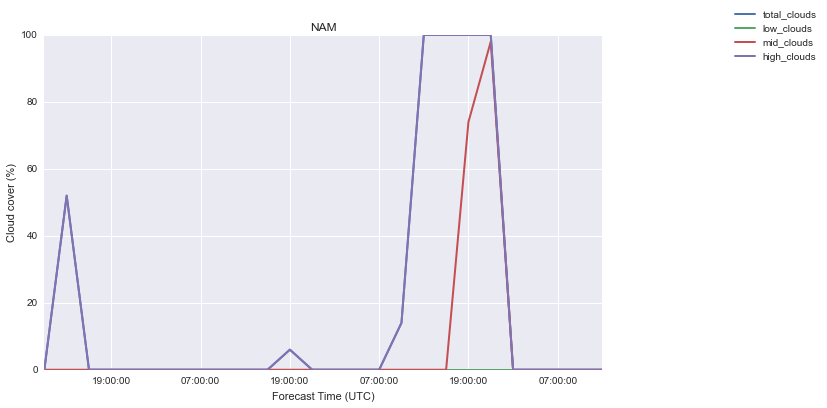

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot(time_vals, data[varname], linewidth=2, label=varname)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))
ax.set_title('NAM')

AttributeError: 'Series' object has no attribute 'find'

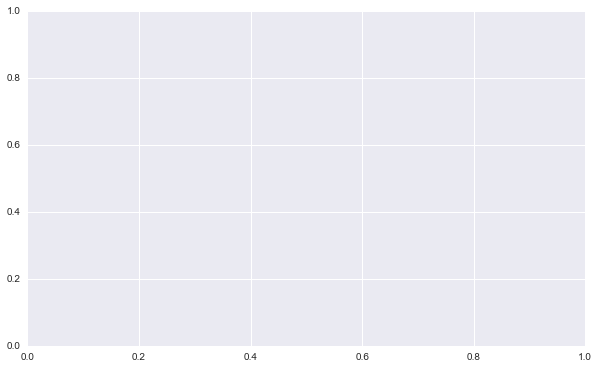

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(time_vals, data['downward_shortwave_radflux_avg'], linewidth=2, label='ghi')
ax.set_ylabel('GHI W/m**2')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend()

In [87]:
fm = NDFD()

In [88]:
data = fm.get_query_data(location,timerange)

In [89]:
time_vals = fm.time

In [90]:
total_cloud_cover = data['total_clouds']
temp = data['temperature']
wind = data['wind_speed_gust']

(0, 100)

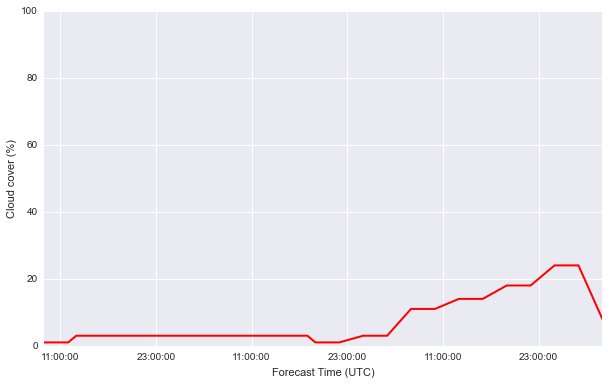

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(time_vals, total_cloud_cover, 'r', linewidth=2)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
plt.ylim(0,100)

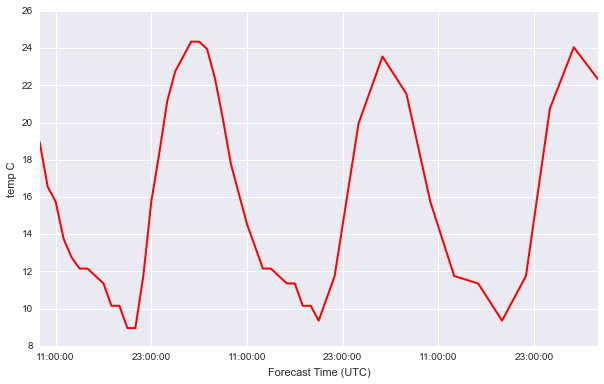

In [92]:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(time_vals, temp, 'r', linewidth=2)
    ax.set_ylabel('temp {}'.format(fm.var_units['temperature']))
    ax.set_xlabel('Forecast Time (UTC)')

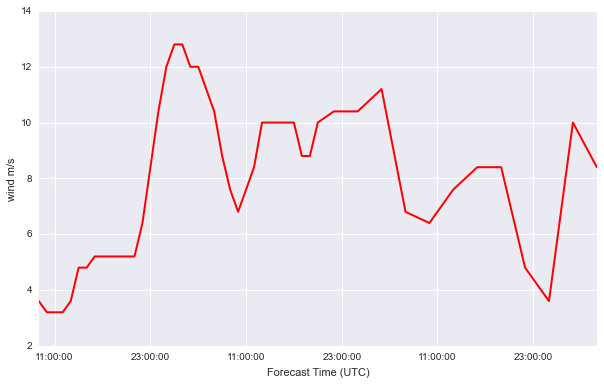

In [93]:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(time_vals, wind, 'r', linewidth=2)
    ax.set_ylabel('wind {}'.format(fm.var_units['wind_speed']))
    ax.set_xlabel('Forecast Time (UTC)')

In [94]:
fm = RAP()

In [95]:
data = fm.get_query_data(location,timerange)

In [96]:
time_vals = fm.time

In [97]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

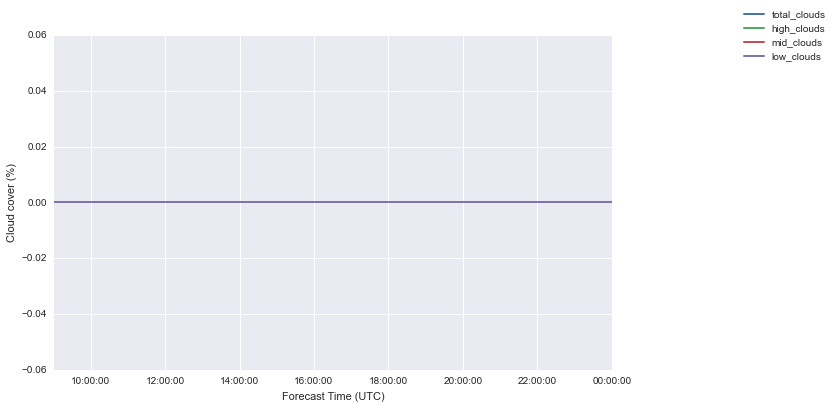

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot(time_vals, data[varname][:].squeeze(), linewidth=2, label=varname)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))

In [99]:
fm = GSD()

c:\derek\programmingfolder\repositories\pvlib\pvlib\forecast.py:464: UserWarning: Experimental model. May not be available.
  warnings.warn('Experimental model. May not be available.')


In [100]:
data = fm.get_query_data(location,timerange)

In [101]:
time_vals = fm.time

In [102]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot(time_vals, data[varname], linewidth=2, label=varname)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))

ValueError: ordinal must be >= 1

In [103]:
ghi = data['downward_shortwave_radflux']

KeyError: 'ghi'

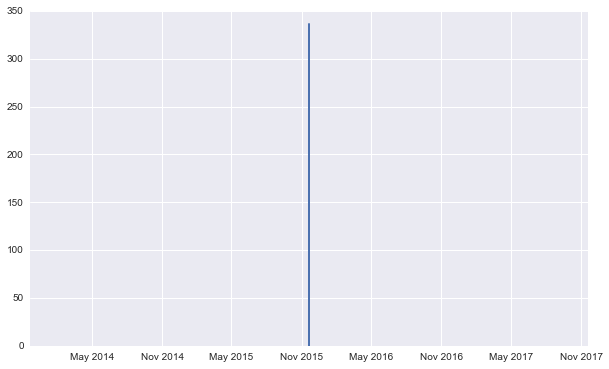

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(time_vals, ghi, linewidth=2)
ax.set_ylabel('GHI' + ' (%s)' % fm.var_units['ghi'])
ax.set_xlabel('Forecast Time (UTC)')

In [107]:
fm = NCEP()

In [108]:
data = fm.get_query_data(location,timerange)

In [109]:
time_vals = fm.time

In [110]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

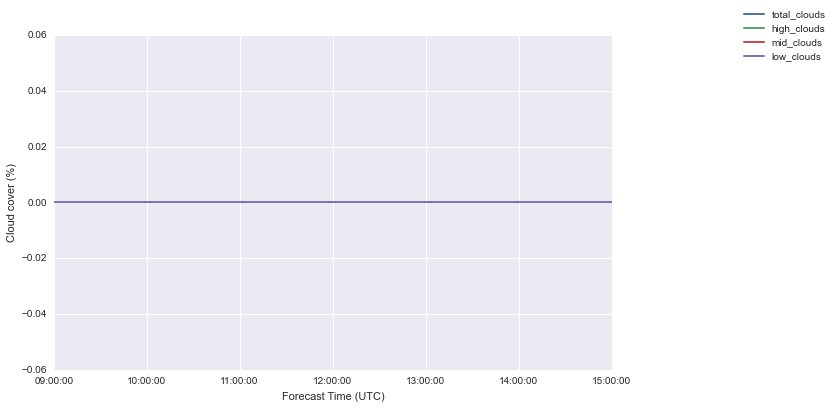

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot(time_vals, data[varname][:].squeeze(), linewidth=2, label=varname)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))